<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1_AI_%ED%95%B4%EC%BB%A4%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기

In [ ]:
path = '/content/drive/MyDrive/항공사 고객 만족 /airline_dataset/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

# 데이터 구성 내용

id : 샘플 아이디

Gender : 성별

Customer Type : Disloyal 또는 Loyal 고객

Age : 나이

Type of Travel : Business 또는 Personal Travel

Class : 등급

Flight Distance : 비행 거리

##########################만족도는 설문조사###################

Seat comfort : 좌석 만족도

Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도

Food and drink : 식음료 만족도

Gate location : 게이트 위치 만족도

Inflight wifi service : 기내 와이파이 서비스 만족도

Inflight entertainment : 기내 엔터테인먼트 만족도

Online support : 온라인 지원 만족도

Ease of Online booking : 온라인 예매 편리성 만족도

On-board service : 탑승 서비스 만족도

Leg room service : Leg room 서비스 만족도

Baggage handling : 수하물 처리 만족도

Checkin service : 체크인 서비스 만족도

Cleanliness : 청결도 만족도

Online boarding : 온라인보딩 만족도
###############################################################

Departure Delay in Minutes : 출발 지연 시간

Arrival Delay in Minutes : 도착 지연 시간

target : 만족 여부

train = 3000개 / test = 2000개

In [ ]:
#데이터 형태 확인
train.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1


# 결측치 확인

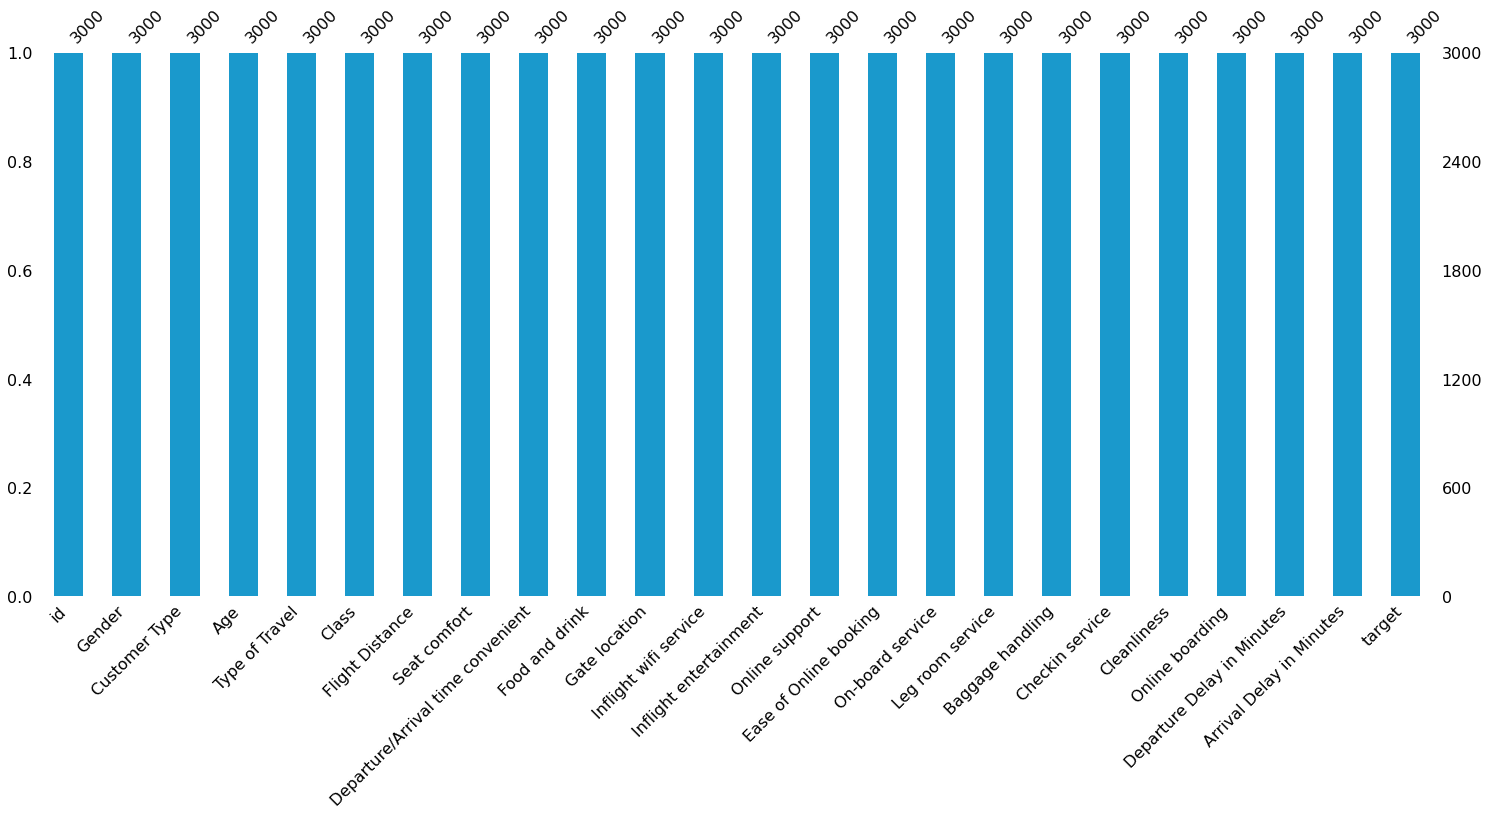

In [ ]:
# 결측치는 존재하지 않음.
import missingno as msno # 결측치 확인 라이브러리

msno.bar(train, color=(0.1, 0.6, 0.8)) # missingno 라이브러리를 이용하여 결측치 확인

# EDA

## 1)상관관계 확인

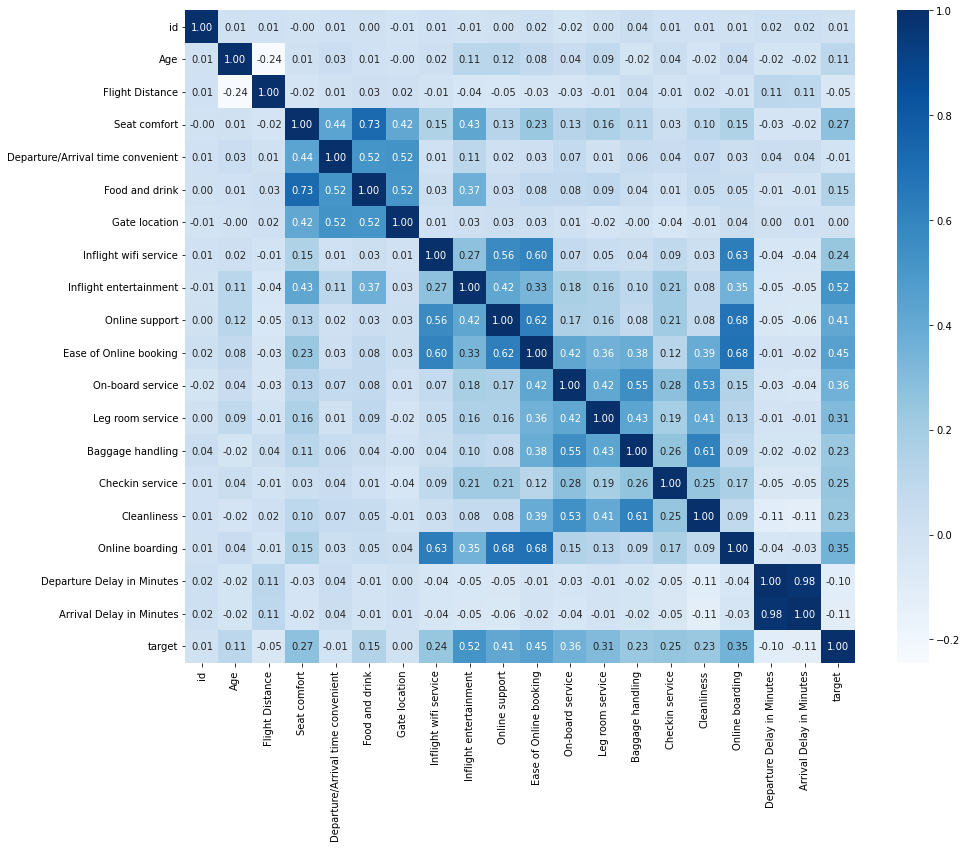

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True,cmap='Blues', fmt='.2f') #전체의 상관관계 시각화

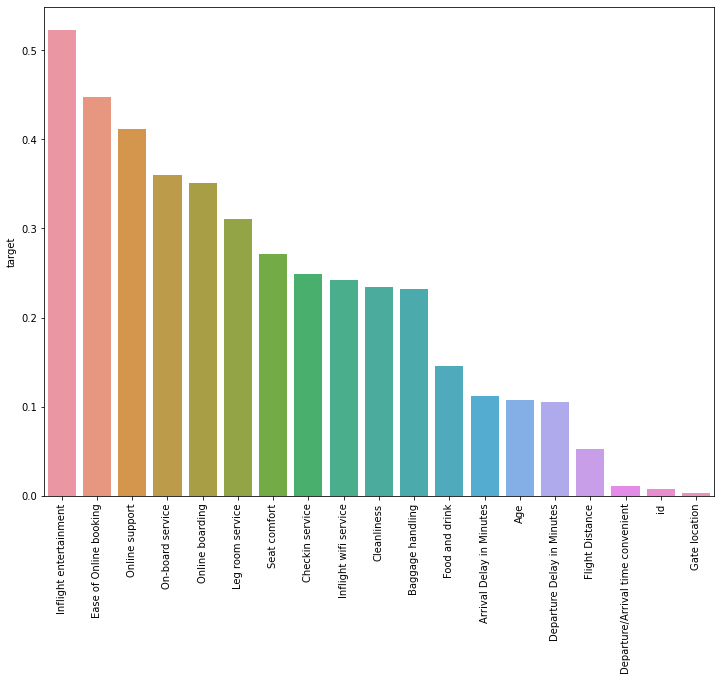

In [ ]:
# target과 어느정도 상관관계가 있는가?
# -> 대부분의 service와 target간에 상관관계가 있어보임.
# -> 그 중 기내 엔터테이먼트, 온라인 예매의 편리성, 온라인 지원이 가장 중요하게 보임.

plt.figure(figsize=(12,9)) # 사이즈 변경
plt.xticks(rotation = 90) # x축 text 회전
sns.barplot(x = abs(train.corr()["target"]).sort_values(ascending = False)[1:].index ,
            y = abs(train.corr()["target"]).sort_values(ascending = False)[1:]) # target을 제외하고 나머지와의 상관관계 시각화

# 2) 각 columns별 target의 분포도 및 분석

##- 1-1)Age 분포

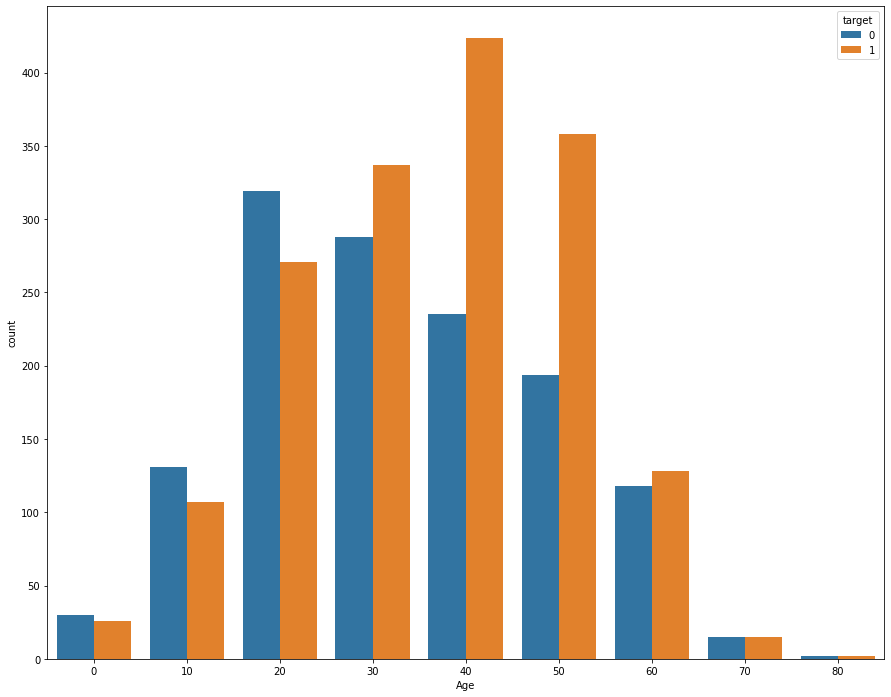

In [ ]:
# Age별 target
# -> 30대 미만은 부정(0), 30대 이상부터는 긍정(1)의 반응이 더 많음.

plt.figure(figsize=(15,12)) # 사이즈 변경
sns.countplot(data= train, x= train['Age']//10 * 10,hue = 'target') # 연령대별 target 분포

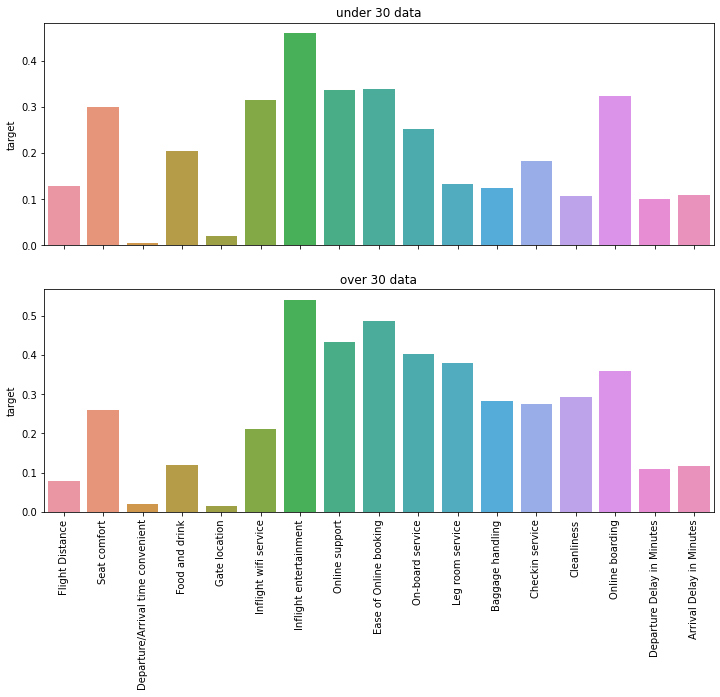

In [ ]:
# 왜 30대부터 긍정(1)이라 답한 사람이 많을까? (같은 서비스를 이용하는데)
# 나이 30미만, 30이상을 기준으로 상관관계를 뽑아보자.
# -> 눈에 띄는 차이점은 30대 미만은 service와 상관관계가 상대적으로 적다.

fig, ax = plt.subplots(2,1, figsize=(12,9))
plt.xticks(rotation = 90) # x축 text 회전

under_30 = sns.barplot(x = abs(train[train["Age"]< 30].corr()["target"]).drop(['target','id','Age']).index ,
            y = abs(train[train["Age"]< 30].corr()["target"]).drop(['target','id','Age']), ax = ax[0])  #target , id , Age 제외한 상관계수 시각화
under_30.set(xticklabels=[]) # 30미만 시각화에 x라벨을 없애줌
under_30.set(title='under 30 data') #

over_30 = sns.barplot(x = abs(train[train["Age"]>= 30].corr()["target"]).drop(['target','id','Age']).index ,
            y = abs(train[train["Age"]>= 30].corr()["target"]).drop(['target','id','Age']), ax = ax[1])
over_30.set(title='over 30 data') #

plt.show()

##- 1-2)Age 전처리

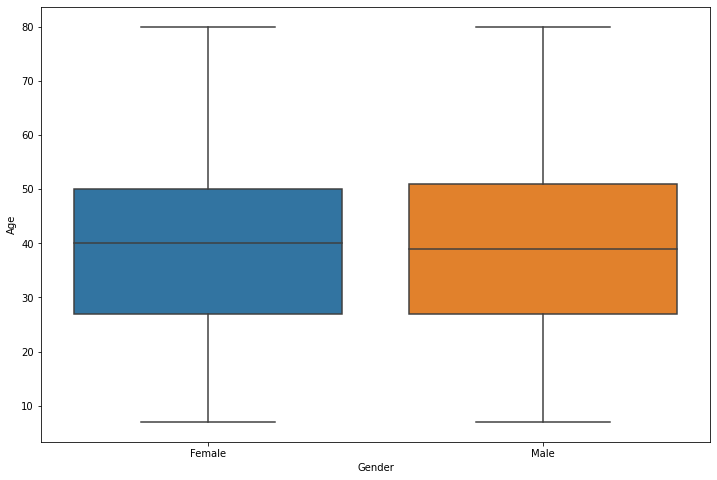

In [ ]:
# 나이에 관해 이상치가 있어보이진 않음.

plt.figure(figsize= (12,8))
sns.boxplot(data= train, x = 'Gender', y= 'Age')

# - 2-1) Flight Distance 분포

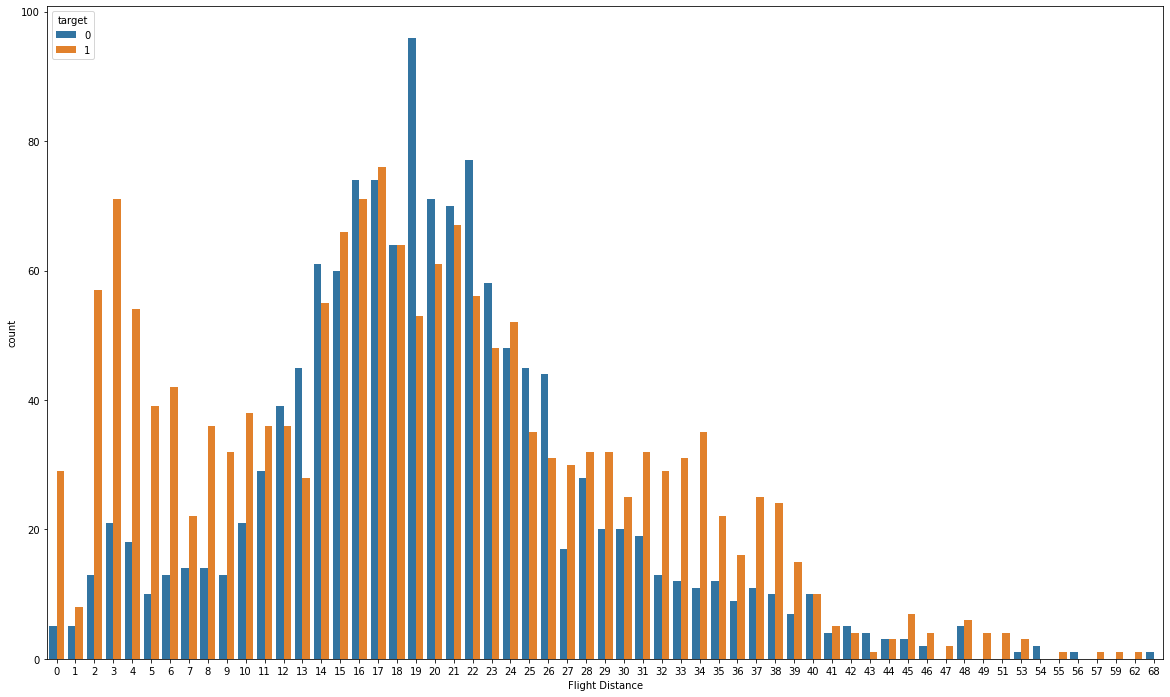

In [ ]:
# Flight Distance별 target
# -> 1200~2600의 거리를 이용한 고객의 만족도가 낮음을 알 수 있었다.
# -> why?

plt.figure(figsize=(20,12)) # 사이즈 변경
sns.countplot(data= train, x= train['Flight Distance'] // 100,hue = 'target')

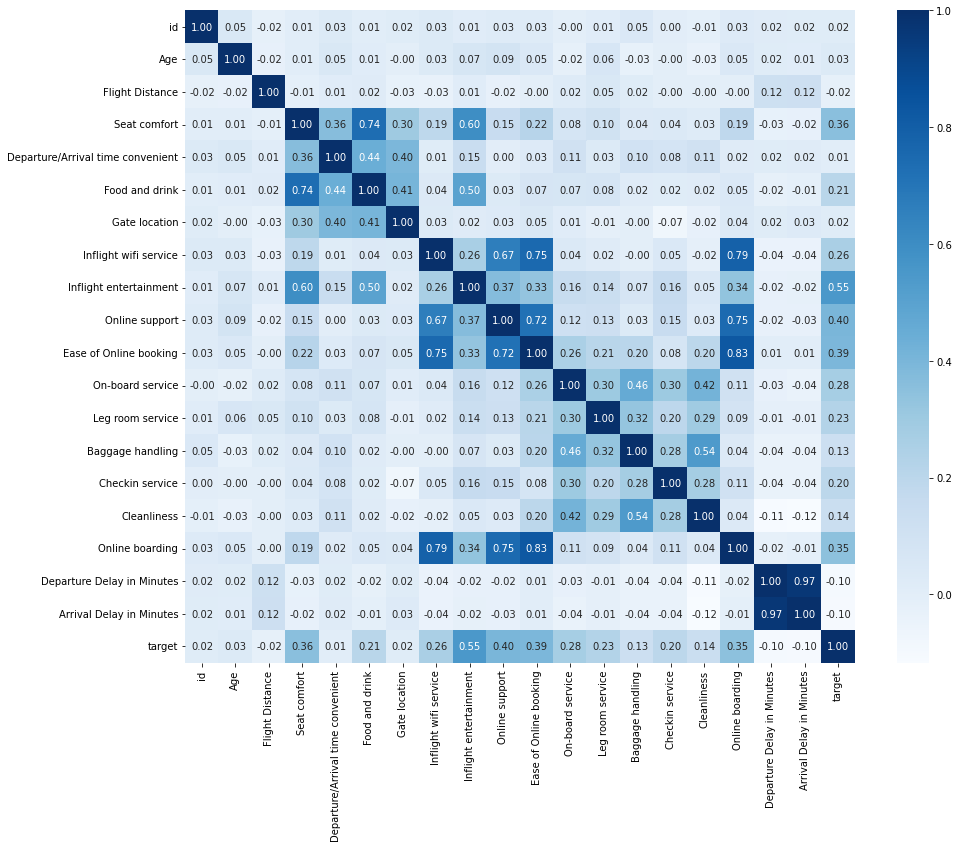

In [ ]:
# 왜 1200~2600 거리를 간 사람은 불만족 했을까?
# 전체 상관관계에서와 차이점을 살펴보면, Seat comfort / Food and drink 상관관계가 각각 +0.09/+0.06 더 상관관계가 있음.
# 1200~2600 거리는 사람들이 Seat comfort / Food and drink를 중요하게 생각한다 볼 수 있고(꽤나 먼 거리를 가니까),
# 반대로 말하면, 항공회사는 Seat comfort / Food and drink의 서비스가 중거리 이용자를 만족시키는 서비스가 아닐것 같음(서비스가 부족함).

plt.figure(figsize=(15,12))
sns.heatmap(train[(train['Flight Distance'] >= 1200) & (train['Flight Distance'] <= 2699)].corr(),
            annot=True,cmap='Blues', fmt='.2f') # 해당하는 data의 상관관계 시각화

# - 2-2) Flight Distance 전처리

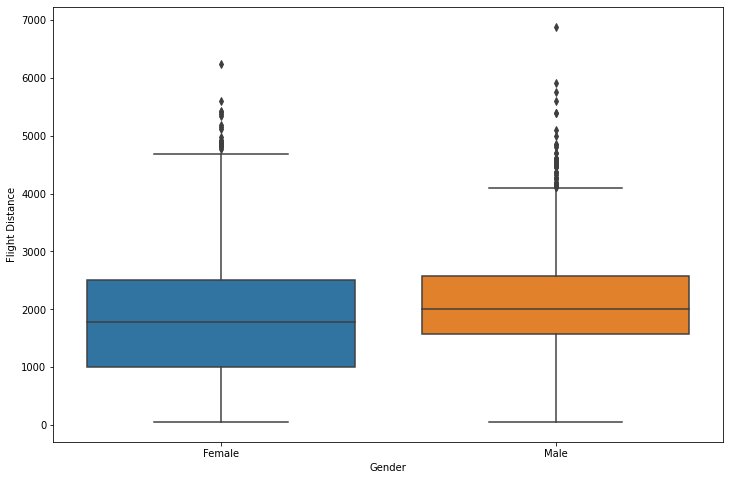

In [ ]:
# * 40,212km: 지구를 한 바퀴
# * 인천 ~ 뉴욕/애틀랜타 비행거리 : 약 11,000km

# 단위를 km라고 생각했을때, 최대가 약 7,000Km 비행을 함.
# 어떤 경로의 데이터들인지는 모르겠으나, 7,000km 비행도 가능은 하므로 이상치라 보지 않겠음.
# train에서 52km가 최저 이동거리임.

# 즉, 이상치 없음
plt.figure(figsize= (12,8))
sns.boxplot(data= train, x = 'Gender', y= 'Flight Distance')

#Service 만족도
- 모든 Service는 0~5 점까지 존재한다고 가정.(단, 0점이 그래프에 그려지지 않는 경우, 0점을 준 사람이 없다고 가정)

- 0(매우 불만족), 1(불만족), 2(약간 불만족),3(약간 만족),4(만족),5(매우 만족)이라 가정.

- 결국 모든 service의 형태를 보아하니, 점수를 높이 줄 수록 긍정(1)이 증가했고,
그렇다고 점수를 낮게 줄 수록 부정(0)이 증가 한것이 아니라, 2,3점에서 부정(0)을 평가한 고객들이 많았음. > 사람의 심리상 정말 불편하지 않았으면 2,3점(중간값)을 부여했지 않았을까?

- 그래서, 0, 1, 2, 3, 4, 5점을 각각 -4, -2, 0, 0, 1, 2 으로 바꿔 총 점수르 계산해보면 좋을 것 같다고 생각함.

결론: 모든 Service 그래프의 형태가 거의 비슷함. 대부분 높은 점수를 주면 긍정이 많고 2,3점에 부정의 답변이 많았음

## - 3-1) Seat Comfort 분포

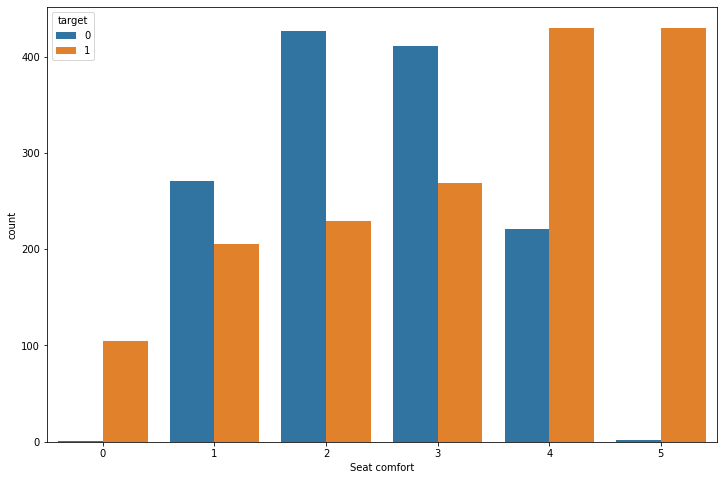

In [ ]:
# Seat comfort별 target
# -> 1~3의 만족도는 부정(0)이 많으나, 4,5는 긍정(1)이 많음
# -> 특히 5에서 뚜렷하게 불만족이 적었음.
# -> 5점을 준 사람들과 2,3점을 준 사람들의 차이점이 무엇일까?

# 추가로 볼 점> 왜 Seat comfort 만족도가 0인 사람의 전체 만족도는 긍정(1)이였는가?
# Seat comfort 를 0점 주고 전체 만족도를 0으로 준 사람은 1명.

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Seat comfort'] ,hue = 'target') # Seat comfort별 target 분포

In [ ]:
# 5점을 준 data를 2,3점을 준 data 평균을 빼보면 어느 columns에서 차이나는지 보이지 않을까?
# 눈에 띄는것은 Delay Minutes가 5점을 준 사람이 평균 6분 정도 덜 Delay되었다.

(train[(train['Seat comfort'] == 5)].describe() - train[(train['Seat comfort'] == 2) | (train['Seat comfort'] == 3) ].describe()).loc["mean",:]

id                                     2.164773
Age                                    0.239055
Flight Distance                     -152.293888
Seat comfort                           2.490637
Departure/Arrival time convenient      1.197872
Food and drink                         1.659041
Gate location                          1.219939
Inflight wifi service                  0.632605
Inflight entertainment                 1.054505
Online support                         0.646041
Ease of Online booking                 0.834228
On-board service                       0.525047
Leg room service                       0.516531
Baggage handling                       0.337484
Checkin service                        0.295563
Cleanliness                            0.329999
Online boarding                        0.654515
Departure Delay in Minutes            -6.254609
Arrival Delay in Minutes              -6.301893
target                                 0.622337
Name: mean, dtype: float64

## - 3-2) Seat Comfort 데이터 전처리

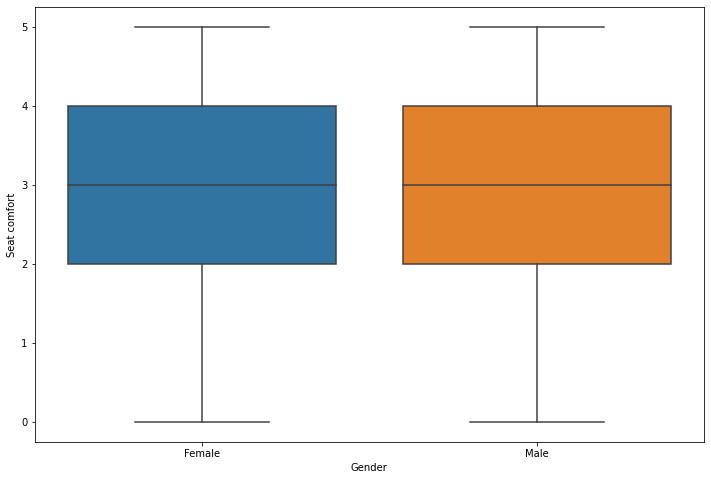

In [ ]:
# Seat comfort의 박스 플롯의 형태를 보니
# 0~5까지 이상치 없이 잘 나타났음.

plt.figure(figsize= (12,8))
sns.boxplot(data= train, x = 'Gender', y= 'Seat comfort')

## - 4-1) Departure/Arrival time convenient 분포

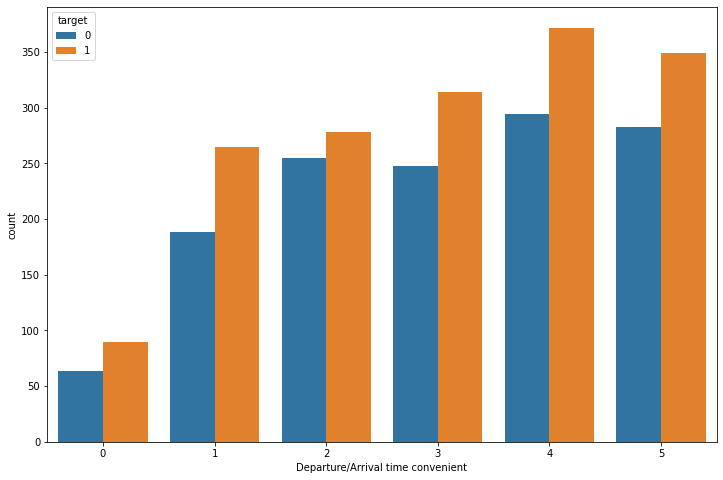

In [ ]:
# Departure/Arrival time convenient(D/A)별 target
# 출발/도착 시간 편의성 만족도? 무슨 의미?
# > 출발/도착 시간이 얼마나 고객의 마음에 들었는가? 라고 가정.
# ex) A라는 사람은 11am 비행기를 타고 싶은데 해당 시간에 비행기가 없다? D/A 점수 낮게 줄 것 같음.
# ex2) B사람은 pm 5에 도착하고 싶은데 pm 7시에 도착하는 비행기만 있다면? D/A 점수 낮게 줄 것 같음.

# -> 전체적으로 D/A 평가는 만족도 평가에 관여하지 않는다고 생각함.
# why? 0~5점까지 모두 긍정(1)의 답이 많았기 때문에.

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Departure/Arrival time convenient'] ,hue = 'target')

## - 4-2) Departure/Arrival time convenient 전처리
- 위 그래프에서 0~5까지만 있으므로 이상치 없다고 판단.

## - 5-1) Food and drink 분포


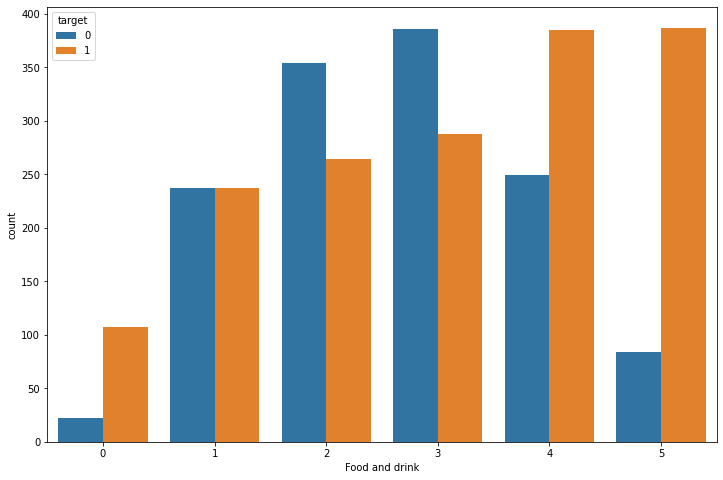

In [ ]:
# Food and drink(Fad)별 target
# Fad 점수에 따라 긍정(1)반응의 수가 많아지고 있음.

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Food and drink'] ,hue = 'target')

## -5-2) Food and drink 전처리
- 따로 해줄 전처리 없음.

## - 6-1) Gate location 분포


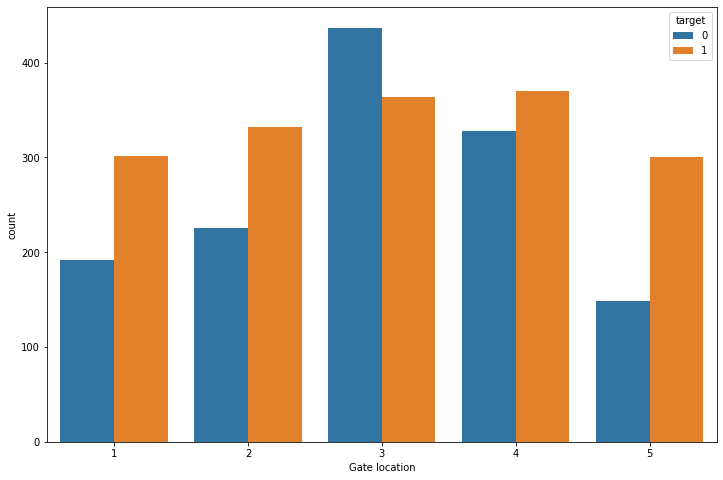

In [ ]:
# Gate location별 target
# 다른 service는 평가 지표가 0~5까지 있지만, 해당 column은 0점이 없음.
# 0점을 준 사람이 한명도 없다고 가정.(원래 평가 지표는 0~5까지 있었다고 가정.)
# 그래프에서 3점을 준 data가 부정(0)

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Gate location'] ,hue = 'target')

## - 6-2) Gate location 전처리
- 따로 해줄 전처리 없음.

## - 7-1) Inflight wifi service 분포

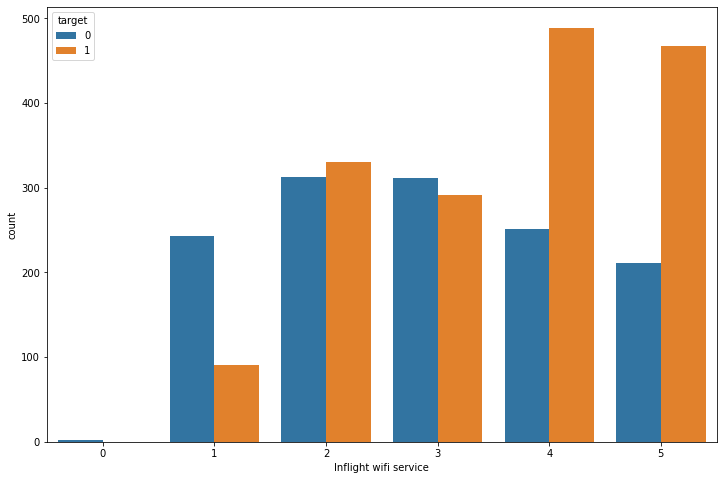

In [ ]:
# Inflight wifi servicen별 target
# 점수가 높아지면 긍정(1)의 수가 늘어나지만,
# 점수가 낮다고 절대적 부정(0)의 수가 많지 않다.
# 심리적으로 고객이 최악의 점수를 주지않고 중간의 값을 선택했지 않았을까? (다른 Service 만족도도 비슷하지 않을까?)

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Inflight wifi service'] ,hue = 'target')

## - 7-2) Inflight wifi service 전처리
- 따로 전처리 해줄 필요 없음

## - 8-1) Inflight entertainment 분포

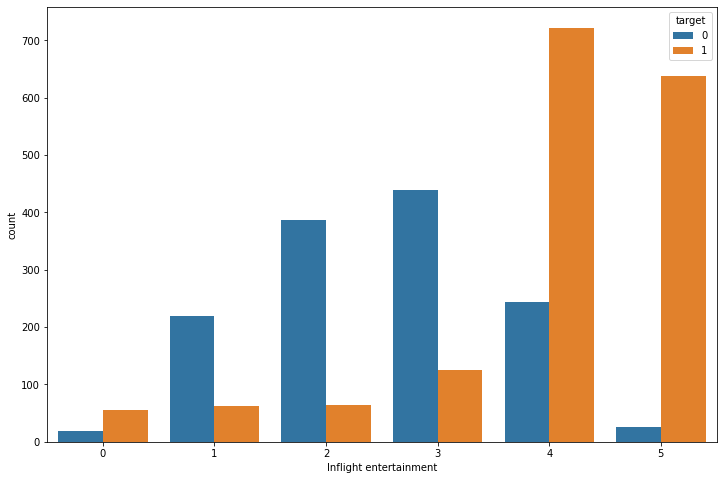

In [ ]:
# Inflight entertainment별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Inflight entertainment'] ,hue = 'target')

## - 8-2) Inflight entertainment 전처리
- 딱히 할 것 없음

## - 9-1) Online support 분포

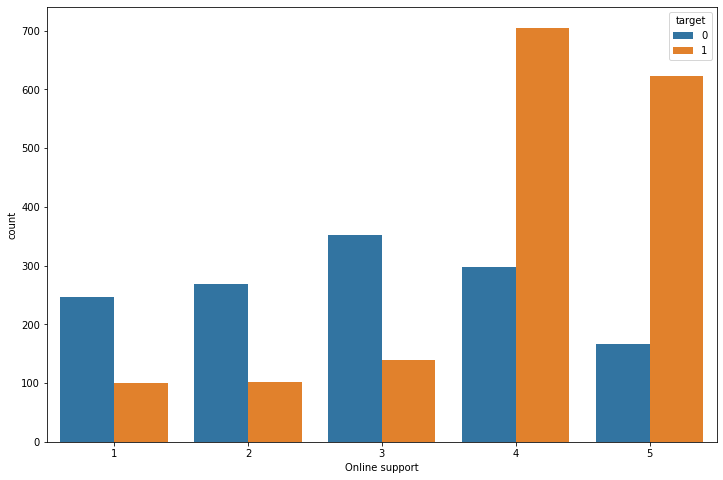

In [ ]:
# Online support별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Online support'] ,hue = 'target')

## - 9-2) Online support 전처리
- 딱히 할 것 없음

## - 10-1) Ease of Online booking 분포

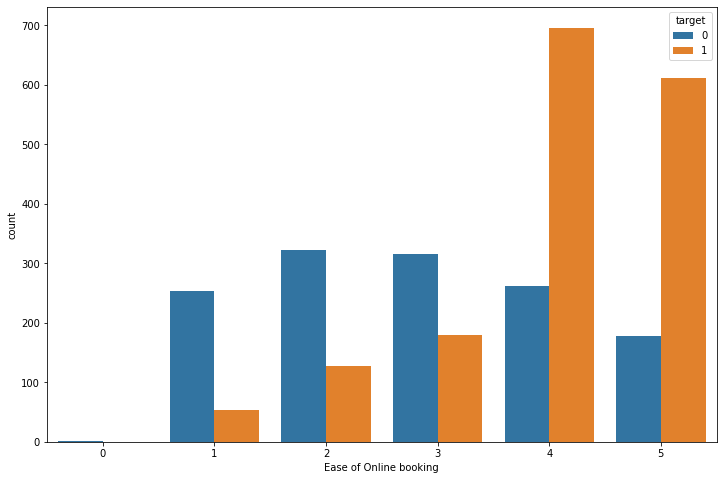

In [ ]:
# Ease of Online booking별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Ease of Online booking'] ,hue = 'target')

## - 10-2) Ease of Online booking 전처리
- 딱히 할 것 없음

## - 11-1) On-board service 분포

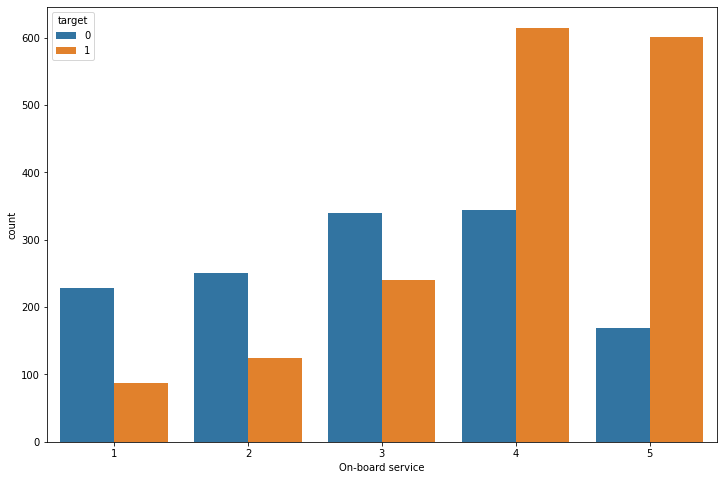

In [ ]:
# On-board service별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['On-board service'] ,hue = 'target')

## - 11-2) On-board service 전처리
- 딱히 할 것 없음

## - 12-1) Leg room service 분포

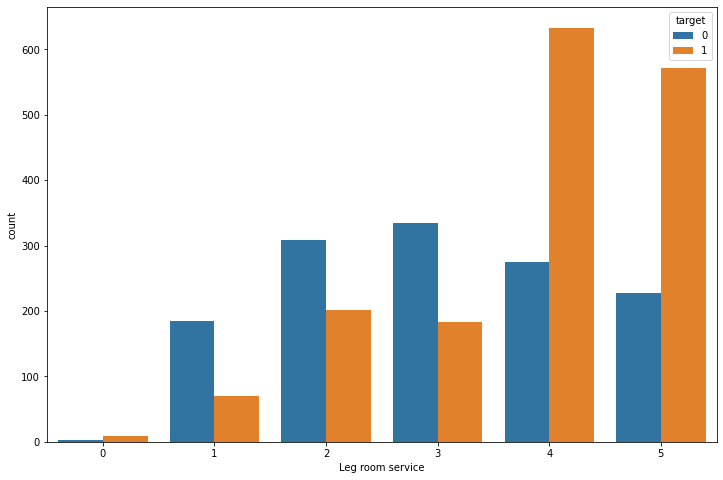

In [ ]:
# Leg room service별 target


plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Leg room service'] ,hue = 'target')

## - 12-2) Leg room service 전처리
- 딱히 할 것 없음

## - 13-1) Baggage handling 분포

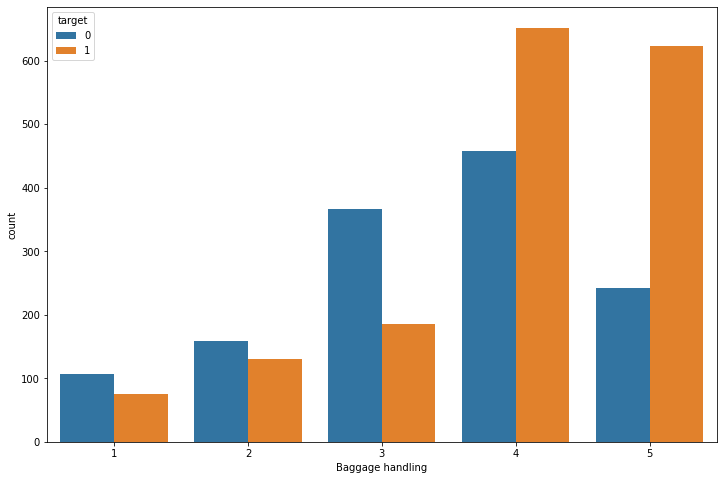

In [ ]:
# Baggage handling별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Baggage handling'] ,hue = 'target')

## - 13-2) Baggage handling 전처리
- 따로 필요하지 않음

## - 14-1) Checkin service 분포

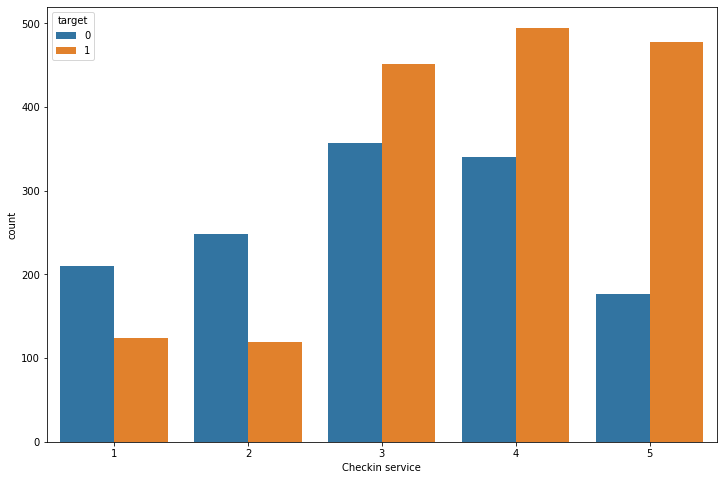

In [ ]:
# Checkin service별 target


plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Checkin service'] ,hue = 'target')

## - 14-2) Checkin service 전처리

## - 15-1) Cleanliness 분포

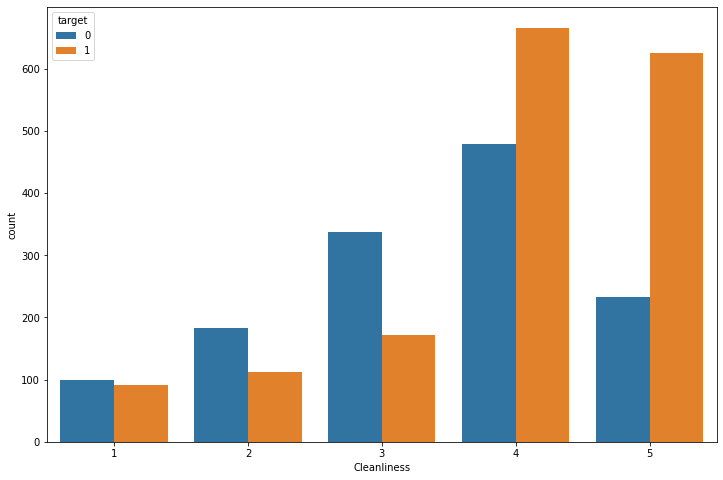

In [ ]:
# Cleanliness별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Cleanliness'] ,hue = 'target')

## - 15-2) Cleanliness 전처리
-딱히 할 과정이 없음

## - 16-1) Online boarding 분포

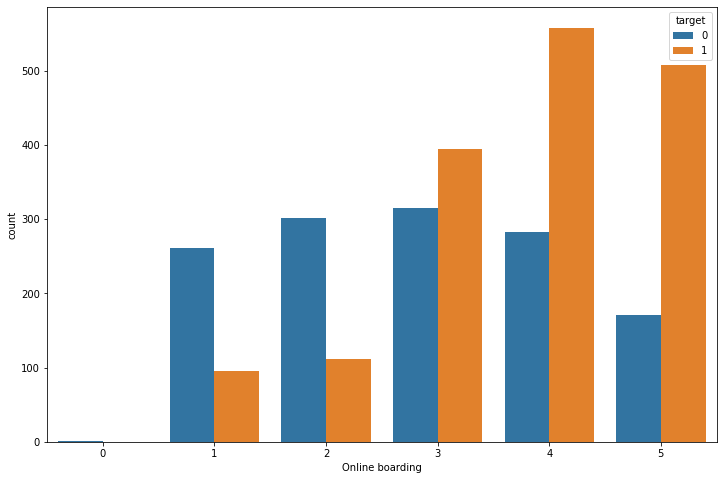

In [ ]:
# Online boarding별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Online boarding'] ,hue = 'target')

## - 16-2)Online boarding 전처리
-딱히 할 것 없음

# Departure Delay in Minutes 분포

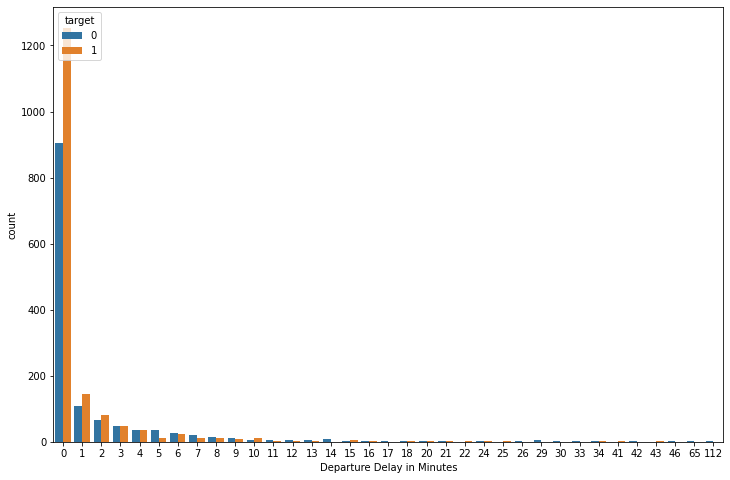

In [ ]:
# Departure Delay in Minutes별 target

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.countplot(data= train, x= train['Departure Delay in Minutes']//10 ,hue = 'target') # Departure Delay in Minutes별 target 분포

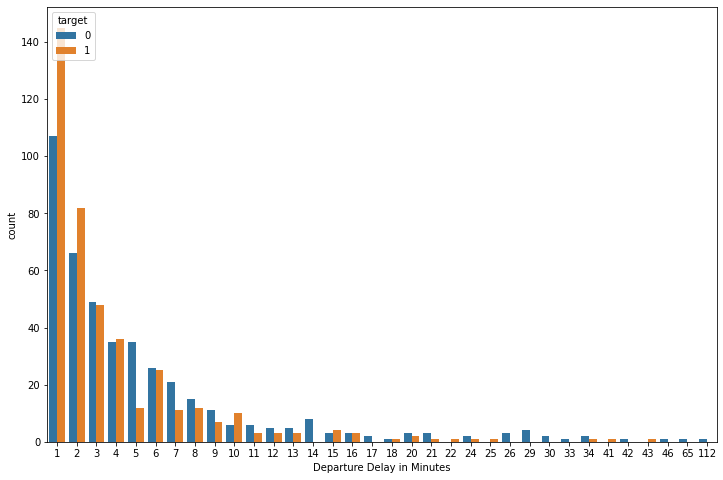

In [ ]:
# 10분 이내 출발 지연을 제외한 나머지 그래프의 형태는 어떨까?
# 지연 시간이 증가하면, 부정(0)이 긍정(1)보다 점점 많이 나오지 않을까?
# 유의미한 차이는 없는 것 같음.

plt.figure(figsize=(12,8)) # 사이즈 변경
temp = train[train['Departure Delay in Minutes']//10  >0].reset_index().drop('index',axis=1) # 10분 이상 지연된 dataset
sns.countplot(data = temp, x= temp['Departure Delay in Minutes']//10,hue = 'target') # Departure Delay in Minutes별 target 분포

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


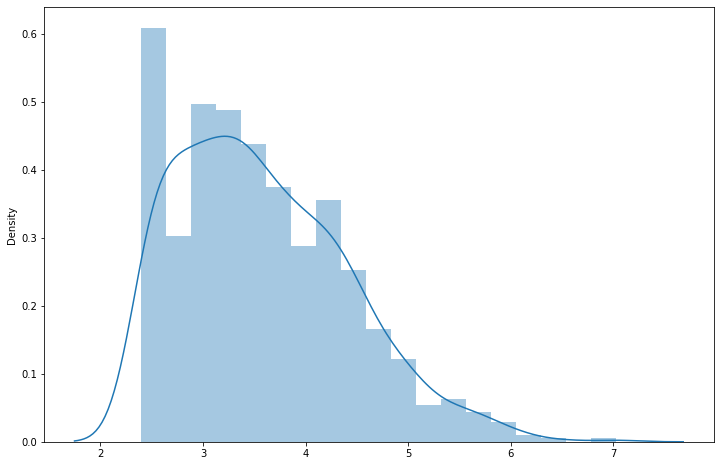

In [ ]:
# 10분 이내 출발 지연을 제외한 나머지 그래프의 형태는 어떨까?

plt.figure(figsize=(12,8)) # 사이즈 변경
temp = train[train['Departure Delay in Minutes']//10  >0].reset_index().drop('index',axis=1) # 10분 이상 지연된 dataset
sns.distplot( x= np.log1p(temp['Departure Delay in Minutes'])) # Departure Delay in Minutes별 target 분포

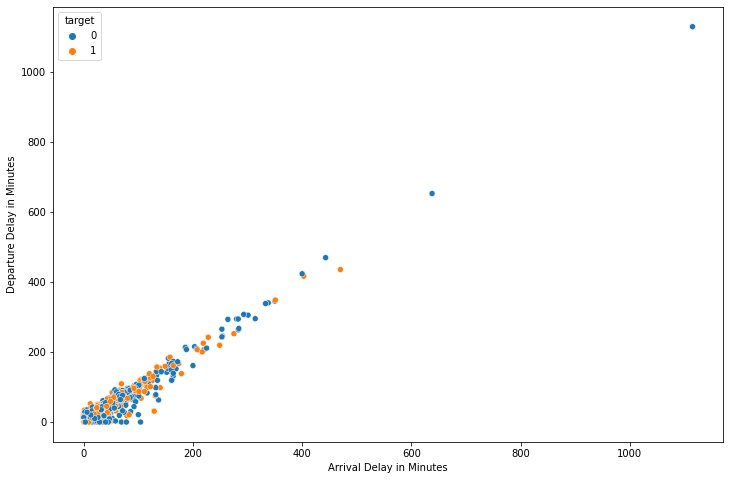

In [ ]:
# Departure Delay in Minutes와 Arrival Delay in Minutes의 관계
# 0.98이라는 상관관계를 가지므로, DDM이 ADM에 포함되어 계산되었다고 판단함.

plt.figure(figsize=(12,8)) # 사이즈 변경
sns.scatterplot(data= train, x= train['Arrival Delay in Minutes'],y = train['Departure Delay in Minutes'] ,hue = 'target')

# 원래 EDA와 modeling 부분을 각 파일로 만들어 진행을 하여, EDA를 복사하여 위에 붙였습니다.

# 구글 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 각종 모델 설치

In [ ]:
!pip install xgboost
!pip install --upgrade xgboost

In [ ]:
!pip install catboost
!pip install pycaret #pycaret 설치
!pip install category_encoders
# !pip install --upgrade pycaret

     |████████████████████████████████| 76.1 MB 65 kB/s 
     |████████████████████████████████| 301 kB 6.7 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 6.8 MB 45.1 MB/s 
     |████████████████████████████████| 2.0 MB 53.3 MB/s 
     |████████████████████████████████| 167 kB 44.5 MB/s 
     |████████████████████████████████| 261 kB 44.6 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 1.7 MB 40.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 56.3 MB/s 
     |████████████████████████████████| 114 kB 61.7 MB/s 
     |████████████████████████████████| 15.6 MB 375 kB/s 
     |████████████████████████████████| 102 kB 13.0 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |█████████████████████

# import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.ordinal import OrdinalEncoder
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# 데이터 불러오기

In [ ]:
path = '/content/drive/MyDrive/항공사 고객 만족 /airline_dataset/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

# 데이터 구성 내용

id : 샘플 아이디

Gender : 성별

Customer Type : Disloyal 또는 Loyal 고객

Age : 나이

Type of Travel : Business 또는 Personal Travel

Class : 등급

Flight Distance : 비행 거리

##########################만족도는 설문조사###################

Seat comfort : 좌석 만족도

Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도

Food and drink : 식음료 만족도

Gate location : 게이트 위치 만족도

Inflight wifi service : 기내 와이파이 서비스 만족도

Inflight entertainment : 기내 엔터테인먼트 만족도

Online support : 온라인 지원 만족도

Ease of Online booking : 온라인 예매 편리성 만족도

On-board service : 탑승 서비스 만족도

Leg room service : Leg room 서비스 만족도

Baggage handling : 수하물 처리 만족도

Checkin service : 체크인 서비스 만족도

Cleanliness : 청결도 만족도

Online boarding : 온라인보딩 만족도
###############################################################

Departure Delay in Minutes : 출발 지연 시간

Arrival Delay in Minutes : 도착 지연 시간

target : 만족 여부

train = 3000개 / test = 2000개

In [ ]:
service_list = ['Seat comfort','Departure/Arrival time convenient','Food and drink' ,'Gate location',
                'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking',
                'On-board service','Leg room service', 'Baggage handling','Checkin service',
                'Cleanliness','Online boarding']

In [ ]:
in_service_list =['Seat comfort', 'Food and drink','Inflight wifi service',
                  'Inflight entertainment', 'Leg room service','Cleanliness']
out_service_list =['Departure/Arrival time convenient','Gate location','Online support',
                   'On-board service','Baggage handling','Checkin service',
                   'Online boarding']

# 필요없는 columns 삭제
- 현재는 id만 삭제

In [ ]:
def drop_id(df,list):
  for i in list:
    df.drop(i,axis=1,inplace = True)

drop_list = ['id']
drop_id(train,drop_list)
drop_id(test,drop_list)

# 라벨 인코딩

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [ ]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('target')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18
Number of Categorical features:  4


In [ ]:
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['target'])
test[categorical_feats] = encoder.transform(test[categorical_feats])

# 로그 변환

In [ ]:
for df in [train,test]:
    df['Flight Distance'] = np.log1p(1+df['Flight Distance'])

In [ ]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,1,22,1,1,7.378384,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,1,2,37,1,2,7.941651,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,2,2,46,1,2,7.872455,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,1,1,24,1,1,7.762171,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,1,2,58,1,2,4.672829,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2,2,30,2,1,7.774436,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,1,1,24,1,1,7.405496,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,1,1,22,1,1,7.275172,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,1,1,33,1,2,7.677864,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


# pycaret을 이용하여 model 성능 확인
### 여러 fold를 노가다 해봤는데 15가 가장 적절했음.
### data를 처음에 train/validation으로 나눠 2300:700으로 나눠서 진행하니 test에서 좋은 결과가 나오는 걸 봤습니다.
### 그래서 train/validation으로 나누지 말고 모든 데이터를 train으로 사용하니 더 좋은 성과가 나왔습니다.

In [ ]:
model = setup(
    data = train,
    target = "target",
    fold = 15
)

,Description,Value
0,session_id,2518
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 23)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


### 앙상블을 5,7,9,11를 해본 결과 11의 결과가 가장 좋았음.

In [ ]:
top5_model = compare_models(
               round=4,
               sort="Accuracy",
               n_select = 11 )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9352,0.9823,0.9416,0.9421,0.9415,0.8689,0.8696,2.4493
xgboost,Extreme Gradient Boosting,0.9290,0.9801,0.9347,0.9376,0.9359,0.8564,0.8570,4.8233
lightgbm,Light Gradient Boosting Machine,0.9257,0.9813,0.9261,0.9398,0.9325,0.8498,0.8508,0.1240
et,Extra Trees Classifier,0.9214,0.9757,0.9278,0.9310,0.9290,0.8410,0.8420,0.5773
rf,Random Forest Classifier,0.9147,0.9745,0.9252,0.9221,0.9232,0.8273,0.8283,0.5733
gbc,Gradient Boosting Classifier,0.9147,0.9746,0.9209,0.9256,0.9229,0.8275,0.8285,0.4620
lr,Logistic Regression,0.8947,0.9617,0.9046,0.9068,0.9049,0.7870,0.7887,0.6647
ada,Ada Boost Classifier,0.8938,0.9581,0.8960,0.9122,0.9035,0.7854,0.7867,0.1833
lda,Linear Discriminant Analysis,0.8866,0.9602,0.8977,0.8990,0.8977,0.7706,0.7721,0.0447
ridge,Ridge Classifier,0.8842,0.0000,0.8969,0.8958,0.8957,0.7657,0.7671,0.0160


### top5라 적혀있지만 실제로는 top11입니다..
###tune_model이 모델을 튜닝해준다고 하기에 사용해봤습니다.
###n_iter 파라미터를 사용하면 튜닝 결과를 향상 시킬수 있다고 하여 10/15/20을 해본 결과 10이 가장 좋았습니다.


In [ ]:
tuned_top5 = [tune_model(i,n_iter = 10) for i in top5_model]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9598,0.8974,0.9211,0.9091,0.7980,0.7984
1,0.8857,0.9562,0.8846,0.9079,0.8961,0.7692,0.7695
2,0.8857,0.9343,0.8718,0.9189,0.8947,0.7699,0.7712
3,0.9143,0.9590,0.9231,0.9231,0.9231,0.8263,0.8263
4,0.8643,0.9141,0.8974,0.8642,0.8805,0.7236,0.7243
5,0.9429,0.9665,0.9744,0.9268,0.9500,0.8834,0.8849
6,0.8571,0.9173,0.8718,0.8718,0.8718,0.7105,0.7105
7,0.9071,0.9501,0.8974,0.9333,0.9150,0.8128,0.8135
8,0.8571,0.9150,0.8701,0.8701,0.8701,0.7114,0.7114
9,0.8714,0.9135,0.8831,0.8831,0.8831,0.7403,0.7403


# 처음에는 voting을 사용했지만, 공부를 하다보니 voting보단 stacking이 더 좋은 결과를 출력할 수 있다는 소리에 stacking을 사용했습니다.

In [ ]:
blender_top5 = stack_models(estimator_list=top5_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9214,0.9864,0.9103,0.9467,0.9281,0.8416,0.8424
1,0.9357,0.9748,0.9359,0.9481,0.9419,0.8699,0.8700
2,0.9571,0.9926,0.9359,0.9865,0.9605,0.9137,0.9152
3,0.9357,0.9849,0.9487,0.9367,0.9427,0.8695,0.8696
4,0.9571,0.9828,0.9487,0.9737,0.9610,0.9134,0.9138
5,0.9429,0.9874,0.9487,0.9487,0.9487,0.8842,0.8842
6,0.9286,0.9706,0.9231,0.9474,0.9351,0.8557,0.8561
7,0.9286,0.9764,0.9103,0.9595,0.9342,0.8562,0.8576
8,0.9286,0.9683,0.9351,0.9351,0.9351,0.8557,0.8557
9,0.9000,0.9683,0.9221,0.8987,0.9103,0.7974,0.7977


In [ ]:
final_model = finalize_model(blender_top5)

In [ ]:
prediction_train = predict_model(final_model, data=train.iloc[2300:])

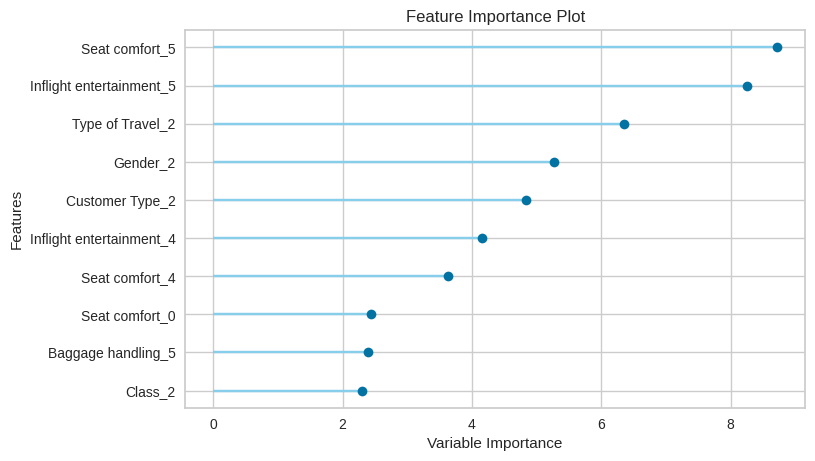

In [ ]:
plot_model(estimator = top5_model[0], plot = 'feature')

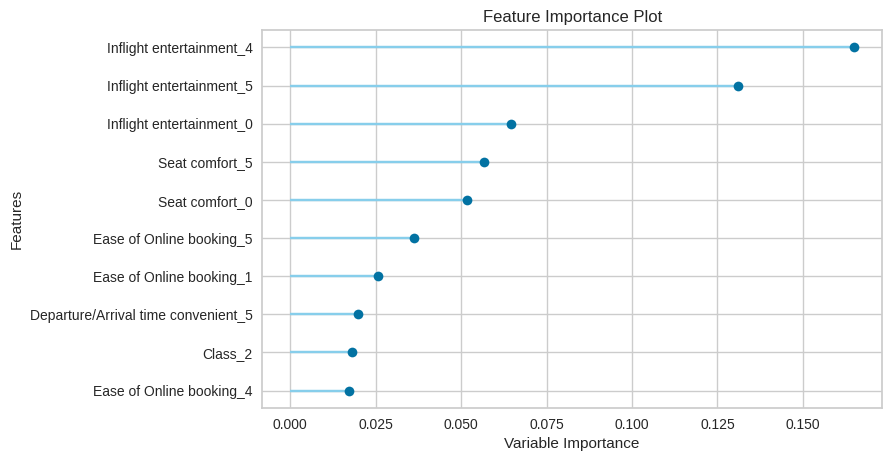

In [ ]:
plot_model(estimator = top5_model[1], plot = 'feature')

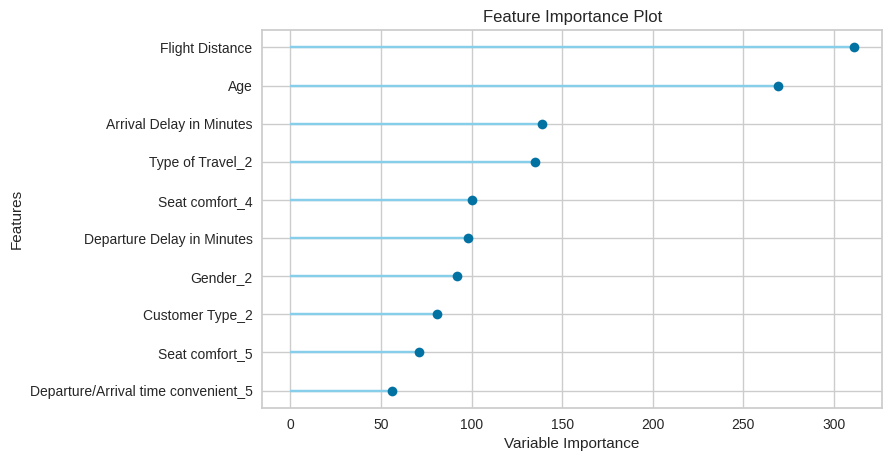

In [ ]:
plot_model(estimator = top5_model[2], plot = 'feature')

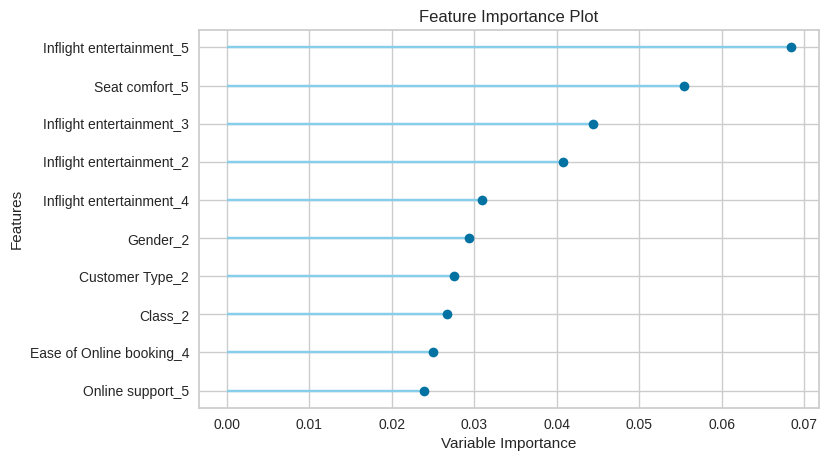

In [ ]:
plot_model(estimator = top5_model[3], plot = 'feature')

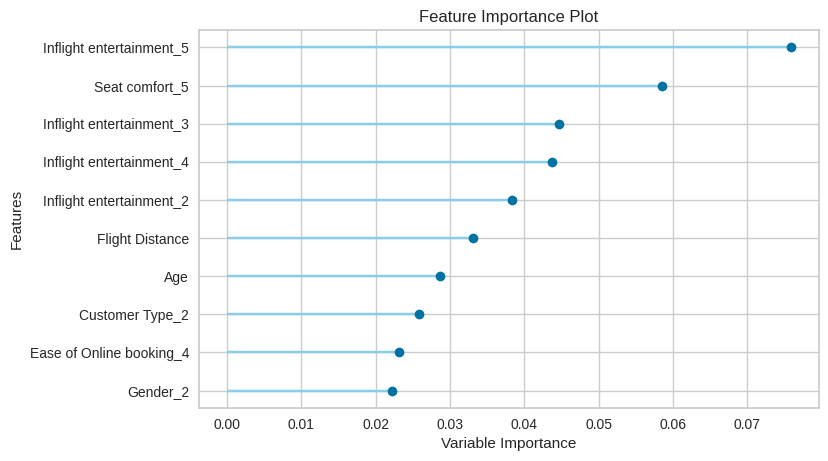

In [ ]:
plot_model(estimator = top5_model[4], plot = 'feature')

In [ ]:
prediction_test = predict_model(final_model, data=test)

In [ ]:
pred_bin=prediction_test["Label"].tolist()

In [ ]:
sample_submission = pd.read_csv(path + '/sample_submission.csv')

sample_submission.target = pred_bin
sample_submission.to_csv("test5.csv",index=False)